# Evidencia y Presentación Final
Alexander Vargas Contreras 
A01570515

Lo primero que se realizó fue importar las bibliotecas, unas que hemos usado anteriormente como pandas para abrir archivos, matplotlib para generar gráficas, y ahora se agregarón nuevas bibliotecas aprendidas recientemente que nos servirán para trabajar con estadística y regresiones lineales.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

Después, utilizando la biblioteca pandas, se importó un archivo en formato csv, en donde se pueden observar datos de peso y estatura de 10,000 personas y estos se pueden dividir entre Hombre y Mujer.

In [2]:
df = pd.read_csv('datasets/weight-height#.csv')
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,2,66.172652,136.777454
9996,2,67.067155,170.867906
9997,2,63.867992,128.475319
9998,2,69.034243,163.852461


Se hicieron dos gráficas una de dispersión de peso vs. estatura y otra donde se observa un diagrama de caja para cada variable (peso y estatura), esto se realizó para poder obtener una mejor visualización de cómo están distrbuidos los datos, en donde si nos fijamos bien, se pueden observar algunos datos atípicos.

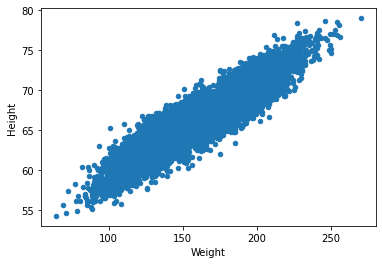

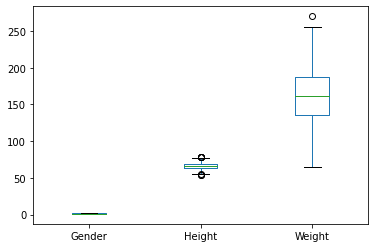

In [3]:
df.plot(kind='scatter', 
        x='Weight', 
        y='Height'
       )

df.plot(kind='box')

plt.show()

Se obtuvo el coeficiente de correlación entre las variables, si se ignora la variable de género, nos da un resultado de 0.924756 el cual es la correlación entre las variables peso y estatura.

In [4]:
df.corr()

,Gender,Height,Weight
Gender,1.000000,-0.691072,-0.796723
Height,-0.691072,1.000000,0.924756
Weight,-0.796723,0.924756,1.000000


Se definieron las variables de peso y estatura, esto para poder obtener un análisis de mínimos cuadrados, mediante un modelo de regresión lineal, a lo que se obtuvieron los siguientes resultados. Esto puede servir para obtener diversa información importante como por ejemplo el R-cuadrado, los coeficietes, el valor de Durbin-Watson, entre otros varios. 

In [5]:
weight = df['Weight']
height = df['Height']

model_ols = sm.OLS.from_formula("height ~ weight", data=df)
result = model_ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:58:12   Log-Likelihood:                -18002.
No. Observations:               10000   AIC:                         3.601e+04
Df Residuals:                    9998   BIC:                         3.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.4779      0.075    645.773      0.000      48.331      48.625
weight         0.1108      0.000    242.975      0.000       0.110       0.112
==============================================================================
Omnibus:                        4.617   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.615
Skew:                          -0.053   Prob(JB):                       0.0995
Kurtosis:                       3.000   Cond. No.                         844.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Separando datos por género

En la base de datos se puede observar que los datos se dividen en géneros, por lo que después de hacer un análisis con los datos completos, me pareció interesante ahora separarlos dependiendo del género, así que lo que se realizó fue primero que nada definir las variables de "Hombre (1)" y "Mujer (2)" ya que estos estaban planteados como números 1 y 2.

In [6]:
Hombre = df.loc[df['Gender']==1]
Mujer = df.loc[df['Gender']==2]

Ya definiendo las variables de género lo que siguió fue definir las nuevas variables de peso y estatura pero ahora por separado dependiendo del género.

In [7]:
pesoH = Hombre ['Weight']
estaturaH = Hombre ['Height']
pesoM = Mujer ['Weight']
estaturaM = Mujer ['Height']

Al definir dichas variables se decidió crear unos gráficos para poder tener una buena visualización de los datos por separado, por lo que se decidieron realizar histogramas de cada variable, peso y estatura, de cada género, y seguido a eso, se crearon unos diagramas de dispersión de peso vs. estatura para ambos hombre y mujer.

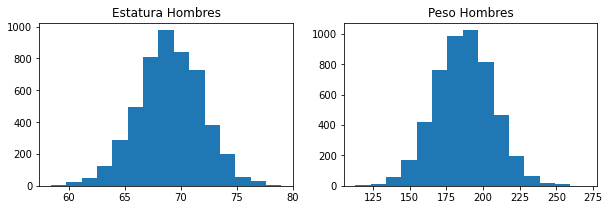

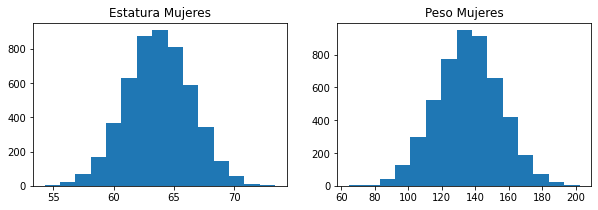

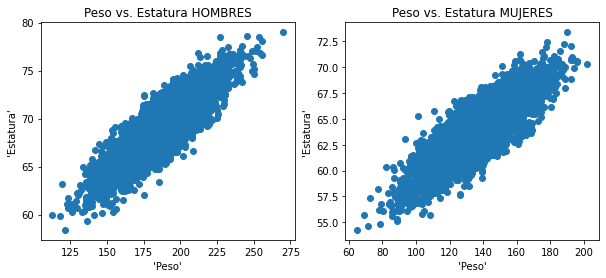

In [8]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.hist(x = estaturaH, bins = 15)
plt.title("Estatura Hombres")

plt.subplot(1,2,2)
plt.hist(x = pesoH, bins = 15)
plt.title("Peso Hombres")

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.hist(x = estaturaM, bins = 15)
plt.title("Estatura Mujeres")

plt.subplot(1,2,2)
plt.hist(x = pesoM, bins = 15)
plt.title("Peso Mujeres")
plt.show()


plt.figure(figsize=(10,4))
# Genera un diagrama de dispersión de peso vs. estatura
plt.subplot(1,2,1)
plt.scatter(x = pesoH, y = estaturaH)
plt.xlabel("'Peso'")
plt.ylabel("'Estatura'")
plt.title("Peso vs. Estatura HOMBRES")

# Genera un diagrama de dispersión de peso vs. estatura
plt.subplot(1,2,2)
plt.scatter(x = pesoM, y = estaturaM)
plt.xlabel("'Peso'")
plt.ylabel("'Estatura'")
plt.title("Peso vs. Estatura MUJERES")
plt.show()


# Preguntas

¿Se puede detectar la presencia de autocorrelación?
- Claro, al realizar el análisis de mínimos cuadrados, se puede observar el valor del estádistico de Durbin-Watson, que al dar un valor de 1.992, se puede decir que si existe autocorrelación entre las variables de peso y estatura.

¿Si prefiero observar los datos separado por género, se podría?
- Por supuesto, lo único que tendrías que hacer es definir las variables de cada género y con ellas las de peso y estatura, teniendo eso podrás comenzar a realizar los análisis por separado.

¿Por qué se ponen gráficos en el análisis?
- Esto se hace básicamente para tener una mejor visualización de los datos, con ellos se podrán observar de maner más concreta el comportamiento que estos tienen, incluso se podría llegar a notar cosas que antes no se veían, como por ejemplo datos atípicos.

¿En los gráficos se observan datos atípicos?
- En los primeros diagramas de caja sí que se observan algunos datos atípicos, aunque en los demás gráficos no se puede decir claramente que se observan, esto puede ser debido a que el número de datos atípicos probablemente sea muy bajo.

¿Qué se puede concluir con los datos?
- Que en promedio los hombres tienen un mayor peso y estatura que las mujeres, esta comparación se puede observar en los gráficos donde viene separado por género, asimismo se puede observar un comportamiento normal por parte de los datos ya que siguen la linea de tendencia.